 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



Optimal Cost: 20.0


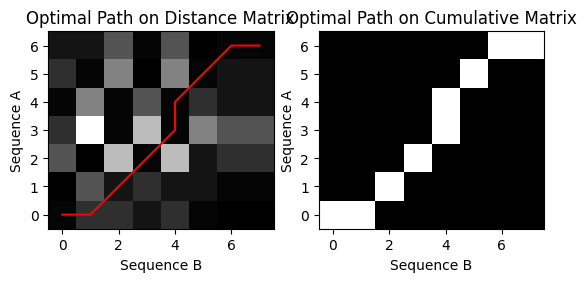

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def DTW(sequence1, sequence2):
    # Initialize cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(sequence1), len(sequence2)))

    # Compute the distance between the sequences and update cumulative distance matrix
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            current_distance = (sequence1[i] - sequence2[j]) ** 2
            if i == 0 and j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance
            elif i == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i, j - 1]
            elif j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i - 1, j]
            else:
                DTW_cumulate_Matrix[i, j] = current_distance + min(
                    DTW_cumulate_Matrix[i - 1, j],
                    DTW_cumulate_Matrix[i - 1, j - 1],
                    DTW_cumulate_Matrix[i, j - 1]
                )

    # Compute the optimal distance by adding the cost from (0,0) to the bottom-right corner

    # Backtrack to find the optimal path starting from the bottom-right corner
    i, j = len(sequence1) - 1, len(sequence2) - 1
    dtw_path = [(i, j)]
    opt_distance = DTW_cumulate_Matrix[i, j]
    while i != 0 or j != 0:
        idx = np.argmin([
            DTW_cumulate_Matrix[i - 1, j] if i > 0 else np.inf,
            DTW_cumulate_Matrix[i - 1, j - 1] if i > 0 and j > 0 else np.inf,
            DTW_cumulate_Matrix[i, j - 1] if j > 0 else np.inf
        ])
        if idx == 0:
            i -= 1
        elif idx == 1:
            i -= 1
            j -= 1
        else:
            j -= 1
        dtw_path.append((i, j))

    return opt_distance, dtw_path[::-1]  # Reverse the path to start from (0,0)

# The rest of the code remains unchanged.


def plotDTWpath(sequence1, sequence2):
    opt_distance, dtw_path = DTW(sequence1, sequence2)

    # Print the optimal cost
    print("Optimal Cost:", opt_distance)

    # Plot the optimal path on distance matrix and cumulative matrix
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    cumulative_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = (sequence1[i] - sequence2[j]) ** 2

    for i, j in dtw_path:
        cumulative_matrix[i, j] = 1

    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, cmap='gray', origin='lower')
    plt.plot([x[1] for x in dtw_path], [x[0] for x in dtw_path], color='red')
    plt.title('Optimal Path on Distance Matrix')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')

    plt.subplot(1, 2, 2)
    plt.imshow(cumulative_matrix, cmap='gray', origin='lower')
    plt.title('Optimal Path on Cumulative Matrix')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')

    plt.show()

# Test the function with provided sequences
A = [4, 3, 7, 0, 2, 6, 5]
B = [3, 7, 1, 6, 1, 5, 4, 4]
plotDTWpath(A, B)


<b> Report your observations </b>

1. Optimal Path on Distance Matrix: The distance matrix shows the absolute differences between each point of sequence A and sequence B. The optimal path, depicted in red, shows the alignment between the two sequences. It starts from the bottom-left corner and ends at the top-right corner, indicating the optimal alignment found by the DTW algorithm. The path appears to align the sequences despite variations in their lengths and the differences between individual points.

2.  Optimal Path on Cumulative Matrix: The cumulative matrix represents the cells traversed by the optimal path. The optimal path, which starts from the bottom-left corner and ends at the top-right corner, is highlighted in white against a black background. Each cell that the optimal path traverses indicates a point of alignment between the two sequences, contributing to the overall optimal distance.

3. DTW Algorithm: The DTW algorithm successfully computes the optimal alignment between the given sequences, taking into account both the differences in values and the possible time shifts. By dynamically aligning the sequences and considering different alignment paths, the DTW algorithm provides a robust similarity measure between sequences that may vary in length or exhibit temporal misalignment. Verification: The plotted results visually confirm that the DTW algorithm effectively aligns the sequences and computes the optimal path from the bottom-left corner to the top-right corner, as expected. The alignment path follows a zigzag pattern, indicating the flexibility of the algorithm in accommodating variations in the sequences.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

# !rm recording_0.wav
# !rm recording_1.wav
# !rm recording_2.wav
# !rm recording_3.wav
# !rm recording_4.wav
# !rm recording_5.wav
# !rm recording_6.wav
# !rm recording_7.wav
# !rm recording_8.wav
# !rm recording_9.wav


#### You can run this module in the loop to record more repetitions of the digits.
for i in range(10):
  if os.path.isfile(f'recording_{i}.wav'):
      print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
  else:
      print("Recording the digits")
      wav = record(2.0) #It will record three seconds of your speech. You can change the duration.
      wav = wav.set_frame_rate(16000)
      sig=wav.get_array_of_samples()
      samples=np.array(sig).T.astype(np.float32)
      fp_arr = np.array(samples).T.astype(np.float32)
      fp_arr /= np.iinfo(sig.typecode).max
      scipy.io.wavfile.write(f'recording_{i}.wav', 16000, fp_arr) #Please change the name.

      # files.download(f'recording_{i}.wav')

  wn = Audio('recording_'+ str(i)+ '.wav', autoplay=False)
  display(wn)

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

Recording the digits


<IPython.core.display.Javascript object>

In [ ]:
# !rm recording_0.wav

print("Recording the digits")
wav = record(2.0) #It will record three seconds of your speech. You can change the duration.
wav = wav.set_frame_rate(16000)
sig=wav.get_array_of_samples()
samples=np.array(sig).T.astype(np.float32)
fp_arr = np.array(samples).T.astype(np.float32)
fp_arr /= np.iinfo(sig.typecode).max
scipy.io.wavfile.write(f'recording_0.wav', 16000, fp_arr)
wn = Audio('recording_'+ str(0)+ '.wav', autoplay=False)
display(wn)

Recording the digits


<IPython.core.display.Javascript object>

In [ ]:
instance = ['a', 'b', 'c']
# print(f'recording_{i}_{instance[0]}.wav')
# !rm recording_0_a.wav
# !rm recording_1_a.wav
# !rm recording_2_a.wav
# !rm recording_3_a.wav
# !rm recording_4_a.wav
# !rm recording_5_a.wav
# !rm recording_6_a.wav
# !rm recording_7_a.wav
# !rm recording_8_a.wav
# !rm recording_9_a.wav

# !rm recording_0_b.wav
# !rm recording_1_b.wav
# !rm recording_2_b.wav
# !rm recording_3_b.wav
# !rm recording_4_b.wav
# !rm recording_5_b.wav
# !rm recording_6_b.wav
# !rm recording_7_b.wav
# !rm recording_8_b.wav
# !rm recording_9_b.wav

# !rm recording_0_c.wav
# !rm recording_1_c.wav
# !rm recording_2_c.wav
# !rm recording_3_c.wav
# !rm recording_4_c.wav
# !rm recording_5_c.wav
# !rm recording_6_c.wav
# !rm recording_7_c.wav
# !rm recording_8_c.wav
# !rm recording_9_c.wav

for i in range(10):
  for j in range(3):
    if os.path.isfile(f'recording_{i}_{instance[j]}.wav'):
        print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
    else:
        print(f"Recording the digit {i} for testing...")
        wav = record(2.0) #It will record three seconds of your speech. You can change the duration.
        wav = wav.set_frame_rate(16000)
        sig=wav.get_array_of_samples()
        samples=np.array(sig).T.astype(np.float32)
        fp_arr = np.array(samples).T.astype(np.float32)
        fp_arr /= np.iinfo(sig.typecode).max
        scipy.io.wavfile.write(f'recording_{i}_{instance[j]}.wav', 16000, fp_arr) #Please change the name.

        # files.download(f'recording_{i}_{instance[j]}.wav')

    wn = Audio(f'recording_{i}_{instance[j]}.wav', autoplay=False)
    display(wn)

wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


In [ ]:
# !rm recording_6_c.wav
# !rm recording_7_a.wav

if os.path.isfile(f'recording_6_c.wav'):
      print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
      print("Recording the digits")
      wav = record(2.0) #It will record three seconds of your speech. You can change the duration.
      wav = wav.set_frame_rate(16000)
      sig=wav.get_array_of_samples()
      samples=np.array(sig).T.astype(np.float32)
      fp_arr = np.array(samples).T.astype(np.float32)
      fp_arr /= np.iinfo(sig.typecode).max
      scipy.io.wavfile.write(f'recording_6_c.wav', 16000, fp_arr) #Please change the name.

wn = Audio(f'recording_6_c.wav', autoplay=False)
display(wn)

if os.path.isfile(f'recording_7_a.wav'):
      print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
      print("Recording the digits")
      wav = record(2.0) #It will record three seconds of your speech. You can change the duration.
      wav = wav.set_frame_rate(16000)
      sig=wav.get_array_of_samples()
      samples=np.array(sig).T.astype(np.float32)
      fp_arr = np.array(samples).T.astype(np.float32)
      fp_arr /= np.iinfo(sig.typecode).max
      scipy.io.wavfile.write(f'recording_7_a.wav', 16000, fp_arr) #Please change the name.

wn = Audio(f'recording_7_a.wav', autoplay=False)
display(wn)

wavefile exists, later part of the code uses 'recording.wav' as input speech


wavefile exists, later part of the code uses 'recording.wav' as input speech


In [ ]:
!pip -q install python_speech_features
!pip -q install speechpy

  Preparing metadata (setup.py) ... done


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import scipy.io.wavfile as wav
import numpy as np
import scipy.io.wavfile
from python_speech_features import mfcc
import speechpy

def compute_mfcc(wavfile):
    # Read WAV file
    rate, sig = wav.read(wavfile)
    sig = sig - np.mean(sig)  # Remove DC offset

    # Compute MFCC features
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01,
                     nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)

    return mfcc_feat_cmvn


###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################

    DTW_cumulate_Matrix = np.zeros((template1.shape[0], template2.shape[0]))
    # print(len(template2))

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(0,len(template1),1): #you can start from 1
        for j in range(0,len(template2),1):
            current_distance = np.linalg.norm(template1[i][:] - template2[j][:]) ** 2    # Compute the euclidean distance between the current feature vectors
            if i == 0 and j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance
            elif i == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i, j - 1]
            elif j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i - 1, j]
            else:
                DTW_cumulate_Matrix[i, j] = current_distance + min(
                    DTW_cumulate_Matrix[i - 1, j],
                    DTW_cumulate_Matrix[i - 1, j - 1],
                    DTW_cumulate_Matrix[i, j - 1]
                )

    i, j = template1.shape[0] - 1, template2.shape[0] - 1
    dtw_path = [(i, j)]
    opt_distance = DTW_cumulate_Matrix[i, j]
    while i != 0 or j != 0:
        idx = np.argmin([
            DTW_cumulate_Matrix[i - 1, j] if i > 0 else np.inf,
            DTW_cumulate_Matrix[i - 1, j - 1] if i > 0 and j > 0 else np.inf,
            DTW_cumulate_Matrix[i, j - 1] if j > 0 else np.inf
        ])
        if idx == 0:
            i -= 1
        elif idx == 1:
            i -= 1
            j -= 1
        else:
            j -= 1
        dtw_path.append((i, j))

    return opt_distance, dtw_path[::-1]


def plotDTWpath2(template1, template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    opt_distance, dtw_path = vectorDTW(template1, template2)
    # print(opt_distance)

    # Compute distance and cumulative distance between the given templates
    distance_matrix = np.zeros((template1.shape[0], template2.shape[0]))
    cumulative_matrix = np.zeros((template1.shape[0], template2.shape[0]))
    for i in range(len(template1)):
        for j in range(len(template2)):
            distance_matrix[i, j] = np.linalg.norm(template1[i][:] - template2[j][:]) ** 2

    for i, j in dtw_path:
        cumulative_matrix[i, j] = 1

    # print(dtw_path)

    # plt.subplot(1, 2, 1)
    # plt.imshow(distance_matrix, cmap='gray', origin='lower')
    # plt.plot([x[1] for x in dtw_path], [x[0] for x in dtw_path], color='red')
    # plt.title('Optimal Path on Distance Matrix')
    # plt.xlabel('Sequence B')
    # plt.ylabel('Sequence A')

    # plt.subplot(1, 2, 2)
    # plt.imshow(cumulative_matrix, cmap='gray', origin='lower')
    # plt.title('Optimal Path on Cumulative Matrix')
    # plt.xlabel('Sequence B')
    # plt.ylabel('Sequence A')

    # plt.show()

    #Obtain the optimal path using "DTW" function
    return opt_distance, dtw_path


**Algorithm to perform isolated digit recognition**

In [ ]:
mfccs=[]

for i in range(10):
    mfccs.append(compute_mfcc(f'recording_{i}.wav'))
count = 0
minss=[]
for i in range(10):
  for j in range(3):
    mc = compute_mfcc(f'recording_{i}_{instance[j]}.wav')
    min_distance = 100000000.00
    argmin = 0
    for z in range (10):
      opt_distance, dtw_path = plotDTWpath2(mc, mfccs[z])
      if opt_distance < min_distance:
        min_distance = opt_distance
        argmin = z
      if z==i:
        count+=1
    minss.append(argmin)

715201.6416138018
[(0, 0), (1, 1), (2, 2), (3, 2), (4, 2), (5, 3), (6, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (8, 15), (9, 16), (10, 17), (10, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (11, 30), (12, 31), (13, 32), (14, 33), (15, 34), (16, 35), (17, 36), (18, 37), (19, 38), (20, 39), (21, 40), (22, 41), (23, 42), (24, 43), (24, 44), (25, 45), (26, 46), (27, 47), (28, 48), (29, 49), (30, 50), (31, 51), (32, 52), (33, 53), (34, 54), (35, 55), (36, 56), (37, 57), (38, 58), (39, 59), (40, 60), (41, 61), (41, 62), (42, 63), (43, 64), (44, 65), (44, 66), (45, 67), (46, 68), (46, 69), (47, 70), (48, 71), (48, 72), (49, 73), (50, 74), (51, 75), (52, 75), (53, 75), (54, 76), (55, 76), (56, 76), (57, 76), (58, 77), (59, 78), (60, 79), (60, 80), (61, 81), (62, 82), (63, 83), (64, 84), (65, 84), (66, 85), (67, 86), (68, 87), (68, 88), (68, 89), (68, 90), (68, 91), (68, 92), (6

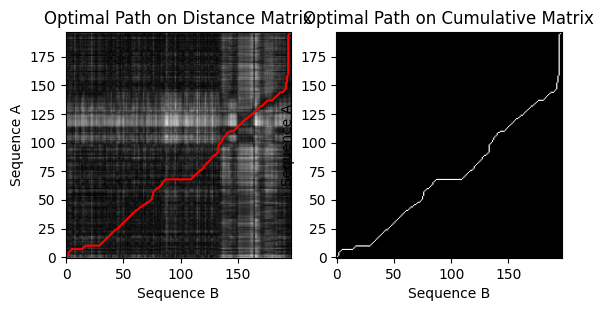

807642.6699537893
[(0, 0), (1, 0), (2, 0), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 3), (9, 4), (10, 5), (11, 6), (12, 7), (13, 8), (14, 9), (15, 10), (16, 11), (17, 12), (18, 13), (19, 13), (20, 14), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (21, 20), (21, 21), (21, 22), (21, 23), (22, 24), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 28), (29, 28), (30, 29), (30, 30), (31, 31), (32, 31), (33, 31), (34, 31), (35, 31), (36, 31), (37, 32), (38, 32), (39, 32), (40, 33), (41, 34), (42, 34), (43, 34), (44, 34), (45, 34), (46, 35), (47, 36), (48, 37), (49, 37), (50, 37), (51, 37), (52, 37), (53, 37), (54, 37), (55, 37), (56, 37), (57, 38), (58, 39), (59, 39), (60, 40), (61, 41), (62, 42), (63, 43), (64, 44), (65, 45), (66, 45), (67, 45), (68, 45), (69, 45), (70, 45), (71, 46), (72, 46), (73, 46), (74, 46), (75, 47), (76, 48), (77, 49), (78, 50), (79, 51), (79, 52), (80, 53), (81, 54), (82, 55), (83, 56), (84, 57), (85, 57), (86, 58), (87, 59), (88, 60), (89, 61), (90, 6

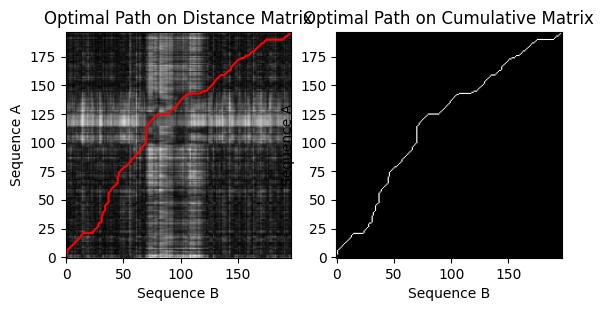

In [ ]:
def plotDTWpath2(template1, template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    opt_distance, dtw_path = vectorDTW(template1, template2)
    print(opt_distance)

    # Compute distance and cumulative distance between the given templates
    distance_matrix = np.zeros((template1.shape[0], template2.shape[0]))
    cumulative_matrix = np.zeros((template1.shape[0], template2.shape[0]))
    for i in range(len(template1)):
        for j in range(len(template2)):
            distance_matrix[i, j] = np.linalg.norm(template1[i][:] - template2[j][:]) ** 2

    for i, j in dtw_path:
        cumulative_matrix[i, j] = 1

    print(dtw_path)

    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, cmap='gray', origin='lower')
    plt.plot([x[1] for x in dtw_path], [x[0] for x in dtw_path], color='red')
    plt.title('Optimal Path on Distance Matrix')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')

    plt.subplot(1, 2, 2)
    plt.imshow(cumulative_matrix, cmap='gray', origin='lower')
    plt.title('Optimal Path on Cumulative Matrix')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')

    plt.show()

    #Obtain the optimal path using "DTW" function
    return opt_distance, dtw_path


mfcc_zero = compute_mfcc('recording_0.wav')
mfcc_one = compute_mfcc('recording_1.wav')
mfcc_zero_b = compute_mfcc('recording_0_a.wav')

opt_distance, dtw_path = plotDTWpath2(mfcc_zero,mfcc_zero_b)
opt_distance, dtw_path = plotDTWpath2(mfcc_zero,mfcc_one)

In [ ]:
def compute_accuracy(targets, predictions):
    correct_count = sum(1 for true_label, pred_label in zip(targets, predictions) if true_label == pred_label)
    total_samples = len(targets)
    accuracy = correct_count / total_samples
    return accuracy

def generate_confusion_matrix(targets, predictions):
    num_classes = max(targets) + 1
    confusion_matrix = [[0] * num_classes for _ in range(num_classes)]

    for true_label, pred_label in zip(targets, predictions):
        confusion_matrix[int(true_label)][int(pred_label)] += 1

    return confusion_matrix


**Plot the optimal DTW path**

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [ ]:
targets = []
for i in range(10):
  for j in range(3):
    targets.append(i)

accuracy = compute_accuracy(targets, minss)
confusion_matrix = generate_confusion_matrix(targets, minss)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)


Accuracy: 86.66666666666667
Confusion Matrix:
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3]


<b> Report your observations </b>

1. The accuracy obtained in digit recognition using DTW is good.

2. When the reference and test signals represent the same digit, the optimal distance is significantly smaller compared to when they represent different digits. Additionally, the optimal paths obtained in both cases are distinct.In the noisy part of the graph, the line is almost linear for same digits, but is zig-zag for cases of different digits.

3. Confusion matrix helps to understand the most confusing digits and for my dataset the most confusing digit is 4 as it is confused with 2 and 7. Also, 5 and 6 also are predicted wrong once.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:
# All imports
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
data_dir = '/content/drive/My Drive/MultiSpeakerDigitData_modified/MultiSpeakerDigitData_modified'

# Initialize dictionaries to store training and testing data for each person
training_data = {}
testing_data = {}

# Iterate through person folders
for person_folder in os.listdir(data_dir):
    person_dir = os.path.join(data_dir, person_folder)

    # Extract person name
    person_name = person_folder.split('_')[0]

    # Initialize lists to store training and testing data
    train_data = []
    train_targets = []
    test_data = []
    test_targets = []

    # Iterate through WAV files in the person's folder
    for wavfile in os.listdir(person_dir):
        parts = wavfile.split('_')
        digit = parts[0]
        serial_number = int(parts[2].split('.')[0])

        # Convert WAV file to MFCC features
        mfcc_features = compute_mfcc(os.path.join(person_dir, wavfile))

        # Decide whether to add to training or testing data
        data_list = train_data if serial_number <= 7 else test_data
        target_list = train_targets if serial_number <= 7 else test_targets

        data_list.append(mfcc_features)
        target_list.append(int(digit))

    training_data[person_name] = {
        'data': train_data,
        'targets': train_targets
    }

    testing_data[person_name] = {
        'data': test_data,
        'targets': test_targets
    }

# Accessing the data:

jackson_training_data = training_data['jackson']['data']
jackson_training_targets = training_data['jackson']['targets']
jackson_testing_data = testing_data['jackson']['data']
jackson_testing_targets = testing_data['jackson']['targets']

nicolas_training_data = training_data['nicolas']['data']
nicolas_training_targets = training_data['nicolas']['targets']
nicolas_testing_data = testing_data['nicolas']['data']
nicolas_testing_targets = testing_data['nicolas']['targets']

theo_training_data = training_data['theo']['data']
theo_training_targets = training_data['theo']['targets']
theo_testing_data = testing_data['theo']['data']
theo_testing_targets = testing_data['theo']['targets']

yweweler_training_data = training_data['yweweler']['data']
yweweler_training_targets = training_data['yweweler']['targets']
yweweler_testing_data = testing_data['yweweler']['data']
yweweler_testing_targets = testing_data['yweweler']['targets']



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The Split For the next part is 80% Test and 20% Train.



In [ ]:
theo_preds=np.zeros(len(theo_testing_targets))
jackson_preds=np.zeros(len(jackson_testing_targets))
nicolas_preds=np.zeros(len(nicolas_testing_targets))
yweweler_preds=np.zeros(len(yweweler_testing_targets))

for i in range(len(theo_testing_targets)):
    min_distance = 100000000.00
    argmin = 0
    for j in range(len(theo_training_data)):
        opt_distance, dtw_path = vectorDTW(theo_training_data[j],theo_testing_data[i])
        if opt_distance < min_distance:
            min_distance = opt_distance
            argmin = theo_training_targets[j]
    theo_preds[i] = argmin

accuracy = compute_accuracy(theo_testing_targets, theo_preds)
confusion_matrix = generate_confusion_matrix(theo_testing_targets, theo_preds)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

for i in range(len(jackson_testing_targets)):
    min_distance = 100000000.00
    argmin = 0
    for j in range(len(jackson_training_data)):
        opt_distance, dtw_path = vectorDTW(jackson_training_data[j],jackson_testing_data[i])
        if opt_distance < min_distance:
            min_distance = opt_distance
            argmin = jackson_training_targets[j]
    jackson_preds[i] = argmin

accuracy = compute_accuracy(jackson_testing_targets, jackson_preds)
confusion_matrix = generate_confusion_matrix(jackson_testing_targets, jackson_preds)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

for i in range(len(nicolas_testing_targets)):
    min_distance = 100000000.00
    argmin = 0
    for j in range(len(nicolas_training_data)):
        opt_distance, dtw_path = vectorDTW(nicolas_training_data[j],nicolas_testing_data[i])
        if opt_distance < min_distance:
            min_distance = opt_distance
            argmin = nicolas_training_targets[j]
    nicolas_preds[i] = argmin

accuracy = compute_accuracy(nicolas_testing_targets, nicolas_preds)
confusion_matrix = generate_confusion_matrix(nicolas_testing_targets, nicolas_preds)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

for i in range(len(yweweler_testing_targets)):
    min_distance = 100000000.00
    argmin = 0
    for j in range(len(yweweler_training_data)):
        opt_distance, dtw_path = vectorDTW(yweweler_training_data[j],yweweler_testing_data[i])
        if opt_distance < min_distance:
            min_distance = opt_distance
            argmin = yweweler_training_targets[j]
    yweweler_preds[i] = argmin

accuracy = compute_accuracy(yweweler_testing_targets, yweweler_preds)
confusion_matrix = generate_confusion_matrix(yweweler_testing_targets, yweweler_preds)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

theo_nicolas_preds=np.zeros(len(theo_testing_targets))
jackson_yweweler_preds=np.zeros(len(jackson_testing_targets))
nicolas_jackson_preds=np.zeros(len(nicolas_testing_targets))
yweweler_theo_preds=np.zeros(len(yweweler_testing_targets))

for i in range(len(theo_testing_targets)):
    min_distance = 100000000.00
    argmin = 0
    for j in range(len(nicolas_training_data)):
        opt_distance, dtw_path = vectorDTW(nicolas_training_data[j],theo_testing_data[i])
        if opt_distance < min_distance:
            min_distance = opt_distance
            argmin = nicolas_training_targets[j]
    theo_nicolas_preds[i] = argmin

accuracy = compute_accuracy(theo_testing_targets, theo_nicolas_preds)
confusion_matrix = generate_confusion_matrix(theo_testing_targets, theo_nicolas_preds)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

for i in range(len(jackson_testing_targets)):
    min_distance = 100000000.00
    argmin = 0
    for j in range(len(yweweler_training_data)):
        opt_distance, dtw_path = vectorDTW(yweweler_training_data[j],jackson_testing_data[i])
        if opt_distance < min_distance:
            min_distance = opt_distance
            argmin = yweweler_training_targets[j]
    jackson_yweweler_preds[i] = argmin

accuracy = compute_accuracy(jackson_testing_targets, jackson_yweweler_preds)
confusion_matrix = generate_confusion_matrix(jackson_testing_targets, jackson_yweweler_preds)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

for i in range(len(nicolas_testing_targets)):
    min_distance = 100000000.00
    argmin = 0
    for j in range(len(jackson_training_data)):
        opt_distance, dtw_path = vectorDTW(jackson_training_data[j],nicolas_testing_data[i])
        if opt_distance < min_distance:
            min_distance = opt_distance
            argmin = jackson_training_targets[j]
    nicolas_jackson_preds[i] = argmin

accuracy = compute_accuracy(nicolas_testing_targets, nicolas_jackson_preds)
confusion_matrix = generate_confusion_matrix(nicolas_testing_targets, nicolas_jackson_preds)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

for i in range(len(yweweler_testing_targets)):
    min_distance = 100000000.00
    argmin = 0
    for j in range(len(theo_training_data)):
        opt_distance, dtw_path = vectorDTW(theo_training_data[j],yweweler_testing_data[i])
        if opt_distance < min_distance:
            min_distance = opt_distance
            argmin = theo_training_targets[j]
    yweweler_theo_preds[i] = argmin

accuracy = compute_accuracy(yweweler_testing_targets,yweweler_theo_preds)
confusion_matrix = generate_confusion_matrix(yweweler_testing_targets, yweweler_theo_preds)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)


Accuracy: 98.33333333333333
Confusion Matrix:
[41, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 42, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 42, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 42, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 42, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 41, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 40, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 42, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 41, 0]
[0, 0, 0, 0, 0, 0, 0, 2, 0, 40]
Accuracy: 98.33333333333333
Confusion Matrix:
[42, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 35, 0, 0, 0, 2, 0, 4, 0, 1]
[0, 0, 42, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 42, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 42, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 42, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 42, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 42, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 42, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 42]
Accuracy: 92.61904761904762
Confusion Matrix:
[36, 0, 0, 6, 0, 0, 0, 0, 0, 0]
[0, 42, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 40, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 37, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 40, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 42, 0, 0, 0, 0]
[0, 0, 1, 10, 0, 0, 31, 0, 0, 

INCREASING THE PERFORMANCE

Take a comprehensive strategy that incorporates a range of tactics to improve the performance of your voice recognition system. Starting from the beginning, work on improving the features' representation. Experiment with various MFCC feature configurations by modifying parameters such as the analysis window size, Mel frequency bins, and cepstral coefficients to better extract features. Try dynamic temporal warping (DTW) variations like rapid DTW, multilayer DTW, or weighted DTW that are designed for efficiency or robustness in voice recognition tasks. Employ delta and delta-delta coefficients in conjunction with MFCCs to include temporal context into feature representation, improve discrimination power, and capture information about the rate of change across time. Normalising or standardising MFCC features can help to ensure consistency and robustness across various utterances and speakers while limiting variances in recording settings and speaker attributes.
To mitigate changes in recording settings and speaker characteristics, normalise or standardise MFCC features to provide consistency and robustness across different utterances and speakers. Enhance the variety and generalisation of your model by including techniques like as time-warping, pitch-shifting, or introducing background noise to your training dataset. To take advantage of complimentary capabilities and improve overall performance, think about utilising fusion techniques to combine DTW with other recognition models such as HMMs, GMMs, or neural networks. In order to handle inter-speaker variability and enhance identification accuracy, incorporate speaker adaption techniques into the DTW model to tailor it to particular speakers or groups of speakers. By capturing statistical correlations between digits, integrate language models or grammatical restrictions to resolve ambiguities and enhance recognition accuracy.


<b> Report your observations </b>

1. When the reference and test signals come from the same speaker, as opposed to scenarios where they come from different speakers, the accuracy of the recognition system increases dramatically. This suggests that the system is better at recognising speech patterns and characteristics that are typical of a single speaker's voice than it is at handling differences brought about by several speakers.

2. Within the same speaker's utterances, speech patterns and acoustic characteristics usually show less variation. Reduced variability increases recognition accuracy and simplifies the alignment procedure.

3. When tested on test signals from the same speaker, recognition models trained on that speaker's data frequently show superior generalisation. This is because during the training phase, the models had learned the speaker's unique voice traits and subtle speech patterns.

4. There is typically more acoustic diversity across speakers, including differences in recording conditions, background noise, and microphone characteristics. This fluctuation introduces more sources of disparity and distortion, which might impair recognition performance.

5. It may be difficult for recognition models that were trained on data from a single speaker to generalise well to test signals from different speakers. These models may have performed less accurately in recognition because they were unable to fully capture the variety of voice traits and speech patterns of different speakers during training.


